<a href="https://colab.research.google.com/github/Ashraful-Reza/Statistics-For-Data-Science/blob/main/CSE303_Sec_01_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Essential Libraries, Metrics**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings-
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

**DataSet  Reading**

In [ ]:
df = pd.read_csv("SD3_data.csv")

**Exploratory Data Analysis**

In [ ]:
df.head(10).style.background_gradient(cmap = "viridis")

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,N2,N3,N4,N5,N6,N7,N8,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9,country,source
0,4,4,4,4,4,4,4,3,4,2,4,2,3,4,4,2,3,4,3,4,3,2,4,4,4,4,4,GB,1
1,2,1,5,2,2,1,2,2,3,1,5,1,1,5,5,1,5,2,1,1,1,5,4,1,5,3,2,US,1
2,3,3,3,5,1,1,5,5,3,2,5,1,1,1,5,1,5,5,3,5,3,1,3,1,2,3,1,US,1
3,5,5,4,5,5,5,5,5,5,5,1,5,5,5,1,5,1,5,5,1,5,2,5,5,5,1,5,GB,3
4,4,4,2,5,5,5,4,1,4,3,4,3,1,5,4,3,2,5,4,5,3,1,4,3,5,4,1,GB,3
5,4,2,2,4,2,3,5,2,2,2,5,2,2,2,4,1,3,5,3,5,4,4,2,2,1,1,5,IT,1
6,4,4,4,2,4,4,4,3,5,4,4,3,3,4,3,2,4,4,3,2,4,2,4,3,4,4,3,GB,1
7,5,5,5,5,5,5,5,4,5,4,1,5,5,5,1,4,1,5,2,5,2,5,5,5,2,5,3,GB,1
8,5,3,4,4,4,4,4,2,4,3,5,2,1,4,5,2,3,4,5,2,4,3,4,4,1,2,1,US,1
9,5,5,5,3,5,5,5,5,5,5,1,5,5,5,1,5,1,5,5,2,5,5,5,5,5,3,5,US,1


In [ ]:
df.drop(['country','source'],inplace=True, axis=1)

In [ ]:
df.head(10).style.background_gradient(cmap = "viridis")

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,N2,N3,N4,N5,N6,N7,N8,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,4,4,4,4,4,4,4,3,4,2,4,2,3,4,4,2,3,4,3,4,3,2,4,4,4,4,4
1,2,1,5,2,2,1,2,2,3,1,5,1,1,5,5,1,5,2,1,1,1,5,4,1,5,3,2
2,3,3,3,5,1,1,5,5,3,2,5,1,1,1,5,1,5,5,3,5,3,1,3,1,2,3,1
3,5,5,4,5,5,5,5,5,5,5,1,5,5,5,1,5,1,5,5,1,5,2,5,5,5,1,5
4,4,4,2,5,5,5,4,1,4,3,4,3,1,5,4,3,2,5,4,5,3,1,4,3,5,4,1
5,4,2,2,4,2,3,5,2,2,2,5,2,2,2,4,1,3,5,3,5,4,4,2,2,1,1,5
6,4,4,4,2,4,4,4,3,5,4,4,3,3,4,3,2,4,4,3,2,4,2,4,3,4,4,3
7,5,5,5,5,5,5,5,4,5,4,1,5,5,5,1,4,1,5,2,5,2,5,5,5,2,5,3
8,5,3,4,4,4,4,4,2,4,3,5,2,1,4,5,2,3,4,5,2,4,3,4,4,1,2,1
9,5,5,5,3,5,5,5,5,5,5,1,5,5,5,1,5,1,5,5,2,5,5,5,5,5,3,5


In [ ]:
## getting last five rows
df.tail().style.background_gradient(cmap = "viridis")

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,N2,N3,N4,N5,N6,N7,N8,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
18187,1,5,2,4,4,5,4,3,5,4,3,4,3,2,5,3,1,2,3,3,3,3,5,3,2,3,3
18188,5,4,5,4,5,4,5,4,5,4,5,3,1,5,5,4,4,3,3,2,2,1,5,2,2,3,4
18189,4,3,3,4,2,3,4,3,4,3,4,2,3,3,3,2,4,3,2,5,3,1,1,1,2,4,1
18190,5,4,3,3,4,4,4,3,4,3,4,3,3,2,4,4,4,4,4,3,3,4,4,3,4,1,3
18191,4,4,4,5,3,4,4,3,3,3,3,3,3,4,4,4,4,4,3,3,3,2,4,3,3,4,4


**Checking Columns**

In [ ]:
df.columns

Index(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9'],
      dtype='object')

**Checking the shape : size of the data**

In [ ]:
df.shape

(18192, 27)

**Data Set Information: Learning the dtypes of columns' and how many non-null values are there in those columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18192 entries, 0 to 18191
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   M1      18192 non-null  int64
 1   M2      18192 non-null  int64
 2   M3      18192 non-null  int64
 3   M4      18192 non-null  int64
 4   M5      18192 non-null  int64
 5   M6      18192 non-null  int64
 6   M7      18192 non-null  int64
 7   M8      18192 non-null  int64
 8   M9      18192 non-null  int64
 9   N1      18192 non-null  int64
 10  N2      18192 non-null  int64
 11  N3      18192 non-null  int64
 12  N4      18192 non-null  int64
 13  N5      18192 non-null  int64
 14  N6      18192 non-null  int64
 15  N7      18192 non-null  int64
 16  N8      18192 non-null  int64
 17  N9      18192 non-null  int64
 18  P1      18192 non-null  int64
 19  P2      18192 non-null  int64
 20  P3      18192 non-null  int64
 21  P4      18192 non-null  int64
 22  P5      18192 non-null  int64
 23  P6      181

**Missing Values Showing**

In [ ]:
missing=df.isnull().sum()
missing=missing[missing>=0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [ ]:
missing

M1    0
P7    0
P6    0
P5    0
P4    0
P3    0
P2    0
P1    0
N9    0
N8    0
N7    0
N6    0
P8    0
N5    0
N3    0
N2    0
N1    0
M9    0
M8    0
M7    0
M6    0
M5    0
M4    0
M3    0
M2    0
N4    0
P9    0
dtype: int64

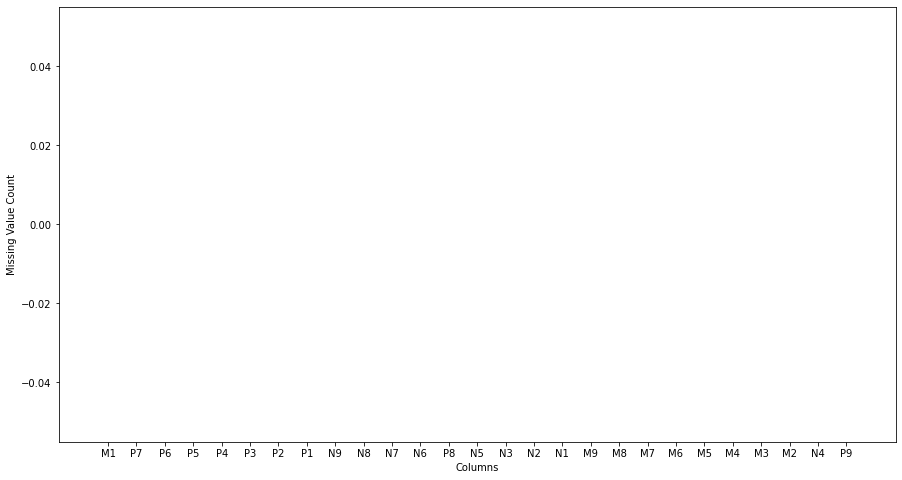

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.bar(missing.index, missing.values)
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.show()

**the statistical summary of dataset**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
M1,18192.0,4.179035,0.962604,0.0,4.0,4.0,5.0,5.0
M2,18192.0,3.476913,1.270001,0.0,2.0,4.0,4.0,5.0
M3,18192.0,3.363017,1.205476,0.0,2.0,3.0,4.0,5.0
M4,18192.0,3.501704,1.190131,0.0,3.0,4.0,4.0,5.0
M5,18192.0,3.569536,1.316122,0.0,3.0,4.0,5.0,5.0
M6,18192.0,3.649516,1.274516,0.0,3.0,4.0,5.0,5.0
M7,18192.0,4.376649,0.870393,0.0,4.0,5.0,5.0,5.0
M8,18192.0,3.160400,1.244590,0.0,2.0,3.0,4.0,5.0
M9,18192.0,4.074263,0.998836,0.0,4.0,4.0,5.0,5.0
N1,18192.0,3.269459,1.147739,0.0,2.0,3.0,4.0,5.0


**Heat Map:Visualizing the correlations between numerical variables**

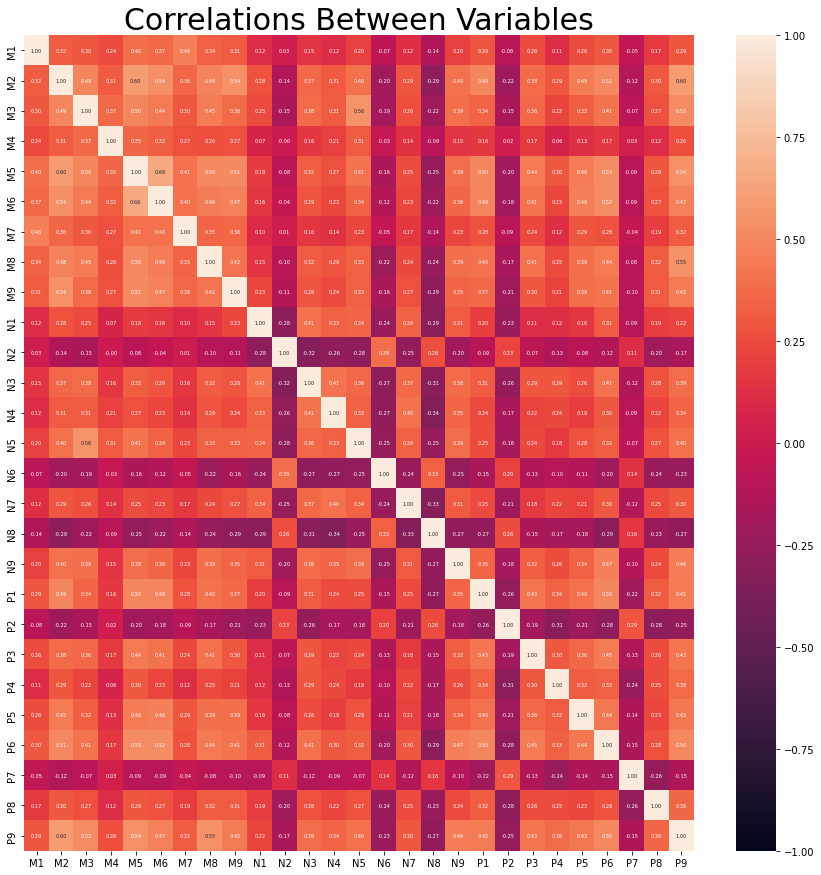

In [ ]:
#Annot=true -->Note that DataFrames will match on position, not index.
plt.figure(figsize=(15,15))
plt.title("Correlations Between Variables", size=30)
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":5}, fmt=".2f", vmin=-1)
plt.show()

**Class Label**

In [ ]:
class_values=[]
for i, row in df.iterrows():
    m_values = [row['M1']+row['M2']+row['M3']+row['M4']+row['M5']+row['M6']+row['M7']+row['M8']+row['M9']]
    n_values = [row['N1']+row['N2']+row['N3']+row['N4']+row['N5']+row['N6']+row['N7']+row['N8']+row['N9']]
    p_values = [row['P1']+row['P2']+row['P3']+row['P4']+row['P5']+row['P6']+row['P7']+row['P8']+row['P9']]
    min_val = min(3.86-sum(m_values)/9, 3.68-sum(n_values)/9, 3.4-sum(p_values)/9)
    if min_val == 3.86-sum(m_values)/9:
        class_values.append(0)
    elif min_val == 3.68-sum(n_values)/9:
        class_values.append(1)
    else:
        class_values.append(2)
# Add the 'Class' column to the DataFrame
df['Class_label'] = class_values
#df = df.drop(['country', 'source'], axis=1)

**Data set after Giving class label**

In [ ]:
df

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,Class_label
0,4,4,4,4,4,4,4,3,4,2,...,3,4,3,2,4,4,4,4,4,2
1,2,1,5,2,2,1,2,2,3,1,...,1,1,1,5,4,1,5,3,2,1
2,3,3,3,5,1,1,5,5,3,2,...,3,5,3,1,3,1,2,3,1,0
3,5,5,4,5,5,5,5,5,5,5,...,5,1,5,2,5,5,5,1,5,0
4,4,4,2,5,5,5,4,1,4,3,...,4,5,3,1,4,3,5,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18187,1,5,2,4,4,5,4,3,5,4,...,3,3,3,3,5,3,2,3,3,0
18188,5,4,5,4,5,4,5,4,5,4,...,3,2,2,1,5,2,2,3,4,0
18189,4,3,3,4,2,3,4,3,4,3,...,2,5,3,1,1,1,2,4,1,0
18190,5,4,3,3,4,4,4,3,4,3,...,4,3,3,4,4,3,4,1,3,0


In [ ]:
print("Display NULL values in each columns: ")
df.isnull().sum()

Display NULL values in each columns: 


M1             0
M2             0
M3             0
M4             0
M5             0
M6             0
M7             0
M8             0
M9             0
N1             0
N2             0
N3             0
N4             0
N5             0
N6             0
N7             0
N8             0
N9             0
P1             0
P2             0
P3             0
P4             0
P5             0
P6             0
P7             0
P8             0
P9             0
Class_label    0
dtype: int64

**Zero Values Count**

In [ ]:
for i in df.columns:
    print(df[i].value_counts())

5    8213
4    6791
3    1772
2    1079
1     322
0      15
Name: M1, dtype: int64
4    6211
5    4372
3    3044
2    2887
1    1642
0      36
Name: M2, dtype: int64
4    5422
3    4330
5    3648
2    3500
1    1262
0      30
Name: M3, dtype: int64
4    7149
5    3760
3    3021
2    3009
1    1226
0      27
Name: M4, dtype: int64
4    5819
5    5390
3    2617
2    2519
1    1822
0      25
Name: M5, dtype: int64
4    6087
5    5567
3    2836
2    2028
1    1645
0      29
Name: M6, dtype: int64
5    10074
4     6084
3     1162
2      585
1      258
0       29
Name: M7, dtype: int64
4    4555
3    4528
2    4170
5    3111
1    1795
0      33
Name: M8, dtype: int64
4    7344
5    7150
3    2113
2    1102
1     450
0      33
Name: M9, dtype: int64
4    5914
3    4800
2    3549
5    2604
1    1304
0      21
Name: N1, dtype: int64
2    4300
4    4151
3    4092
5    3397
1    2226
0      26
Name: N2, dtype: int64
2    6105
3    4584
4    3125
1    3029
5    1329
0      20
Name: N3, dtype: int6

**Data Visualization**

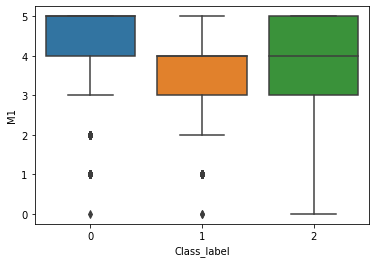

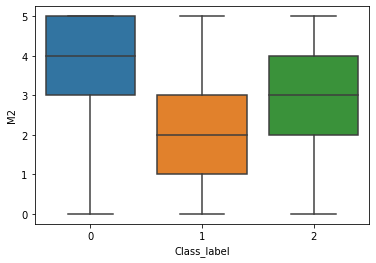

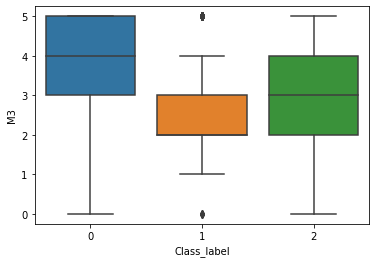

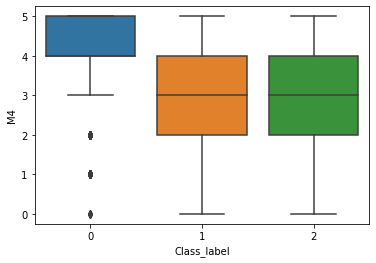

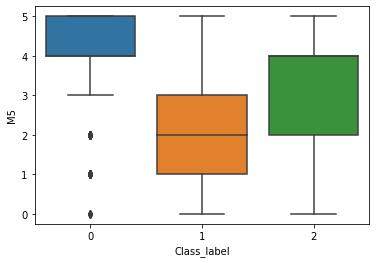

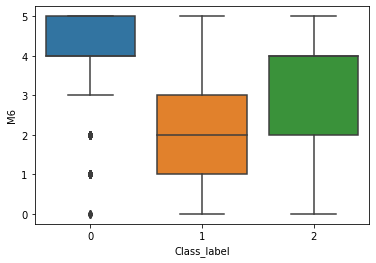

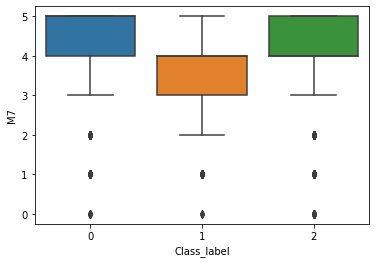

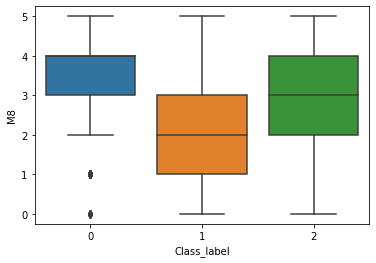

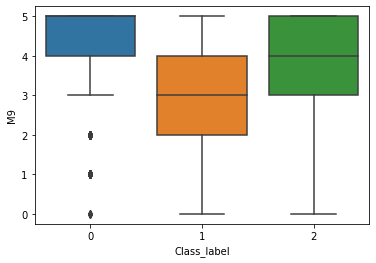

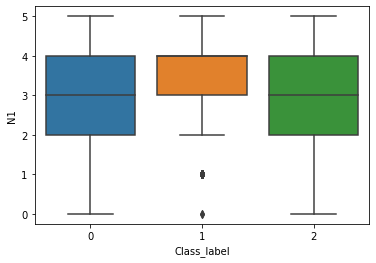

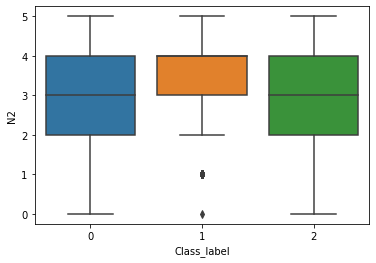

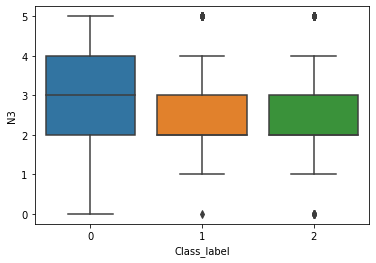

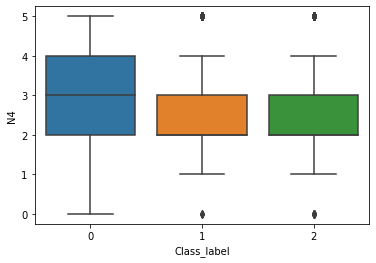

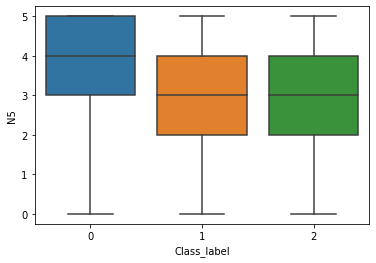

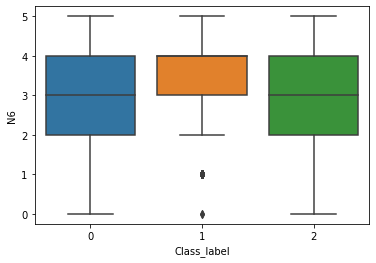

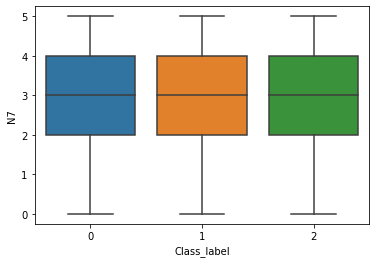

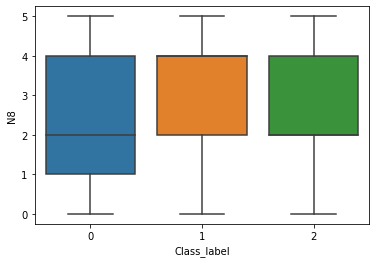

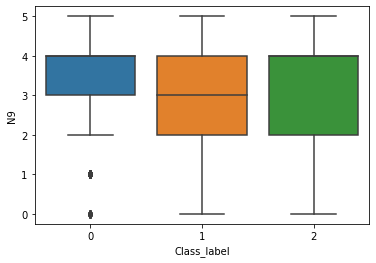

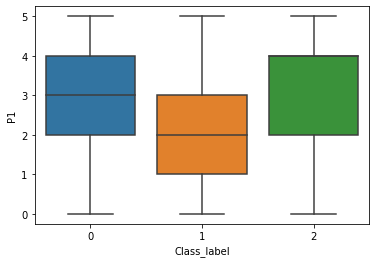

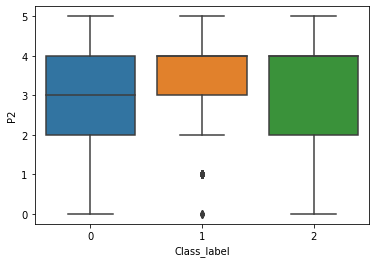

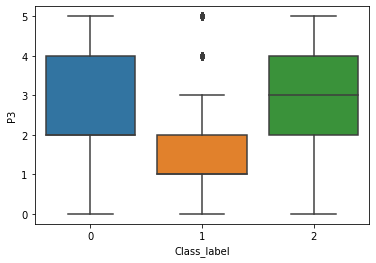

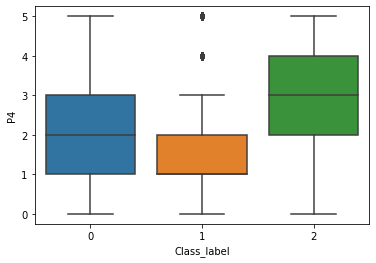

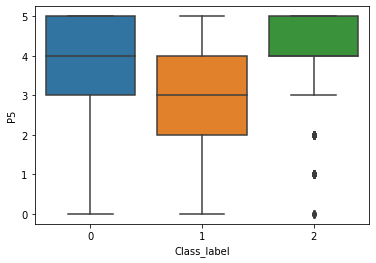

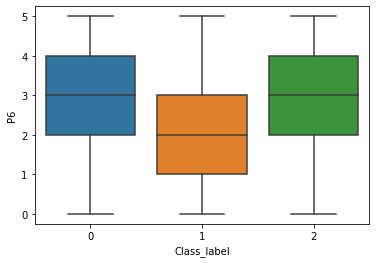

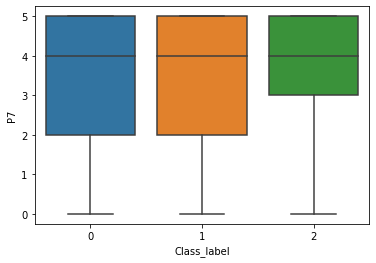

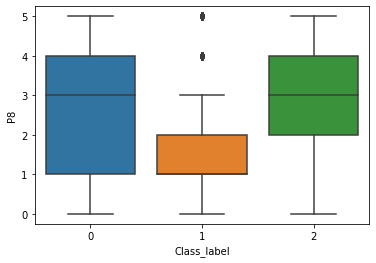

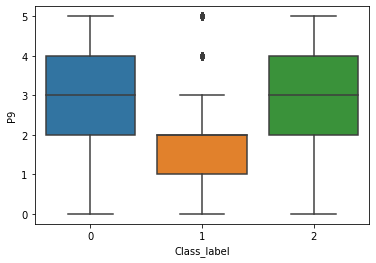

In [ ]:
import seaborn as sns

# Assume your data is in a dataframe called 'df' and the predicted class column is called 'class'

# Create a boxplot for each column against the predicted class
for col in df.columns[:-1]: # assuming the predicted class column is the last column
    sns.boxplot(x='Class_label', y=col, data=df)
    plt.show()

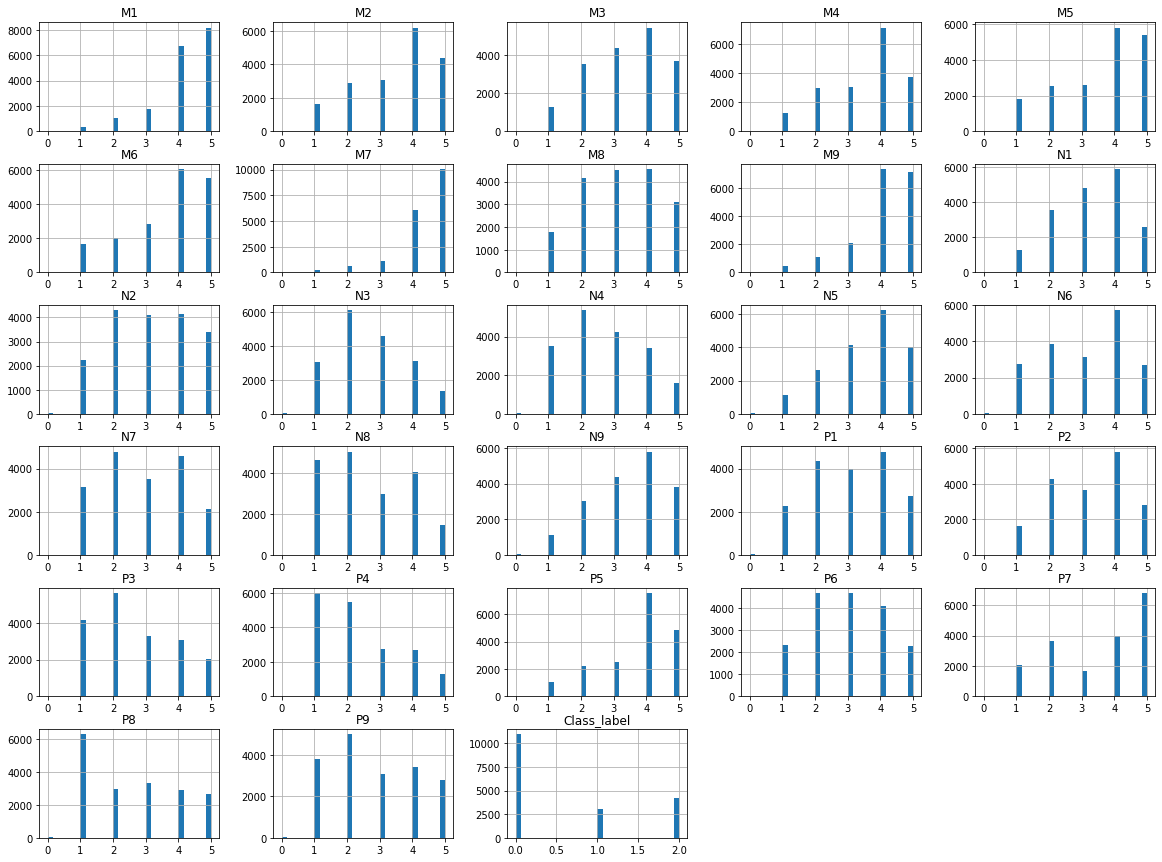

In [ ]:
df.hist(bins=30, figsize=(20,15))
plt.show()

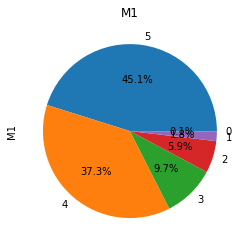

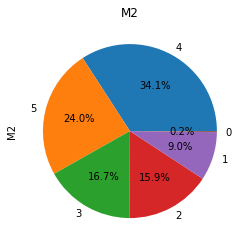

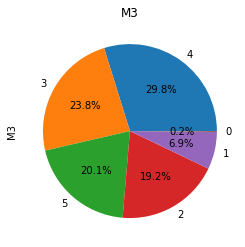

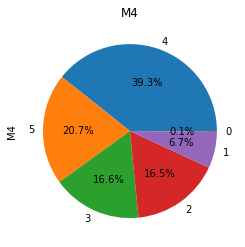

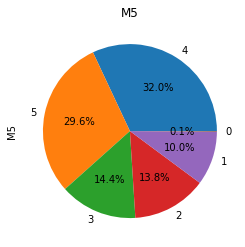

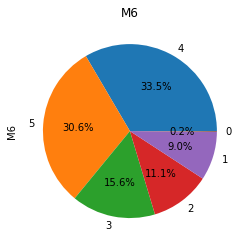

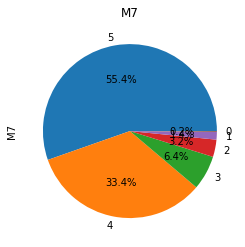

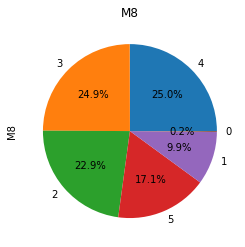

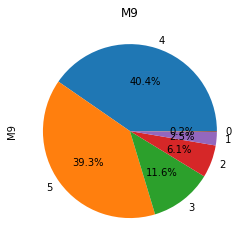

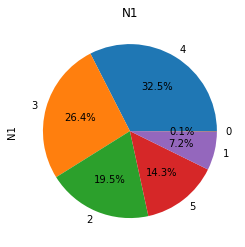

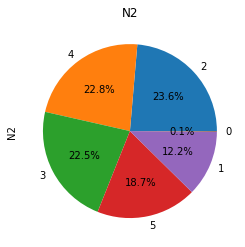

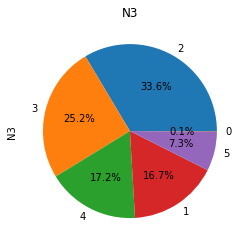

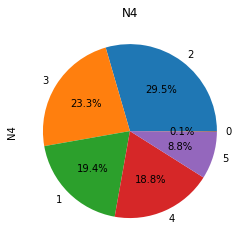

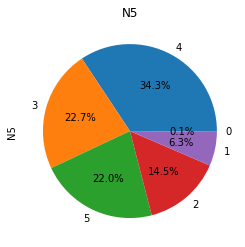

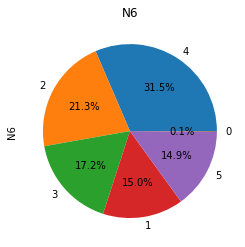

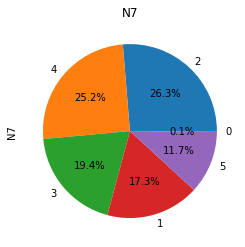

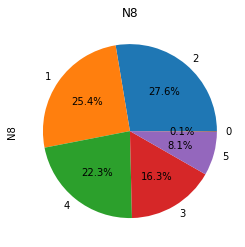

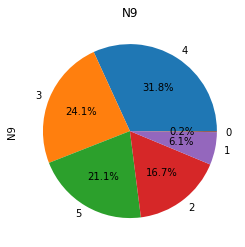

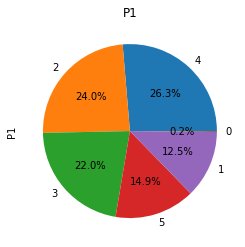

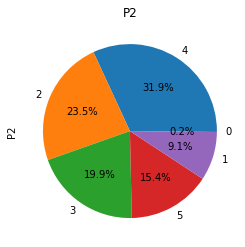

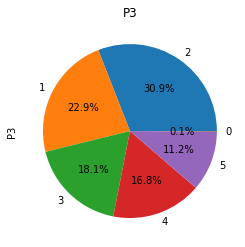

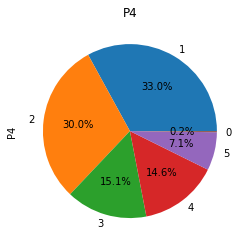

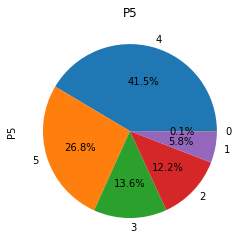

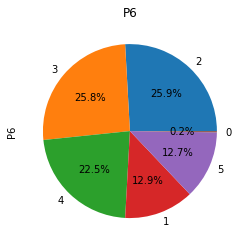

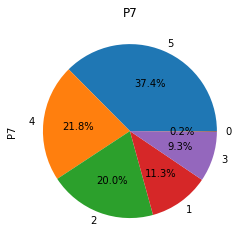

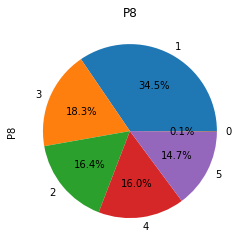

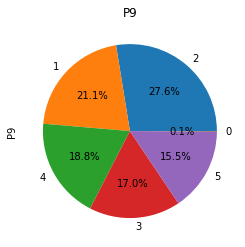

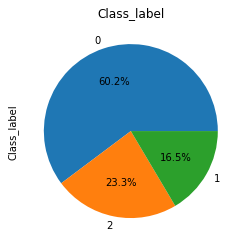

In [ ]:
# loop through each column in the dataframe
for column in df.columns:
    # create a new figure
    plt.figure()
    # plot the pie chart
    df[column].value_counts().plot.pie(autopct='%1.1f%%')
    # add a title to the chart
    plt.title(column)
    # display the chart
    plt.show()

In [ ]:
#x=df.drop(["Class_label"],axis=1)
#y=df["Class_label"]

**Logistic Regression From Scratch**

In [ ]:
# selecting all the features within our dataset
features = df[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'N1', 'N2', 'N3','N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
      'P7', 'P8', 'P9', ]]
features = features.to_numpy() # converts feature set to numpy array
target = df['Class_label'].to_numpy() # converts target column to numpy array
features.shape, len(target)

((18192, 27), 18192)

In [ ]:
# function for standardizing data
def standardScaler(feature_array):


    total_cols = feature_array.shape[1] # total number of columns
    for i in range(total_cols): # iterating through each column
        feature_col = feature_array[:, i]
        mean = feature_col.mean() # mean stores mean value for the column
        std = feature_col.std() # std stores standard deviation value for the column
        feature_array[:, i] = (feature_array[:, i] - mean) / std # standard scaling of each element of the column


In [ ]:
standardScaler(features) # performing standardization on our feature set
# checking if standardization worked
total_cols = features.shape[1] # total number of columns
for i in range(total_cols):
    print(features[:, i].std())

0.6579736224431831
0.7050093002342741
0.6817058044513391
0.798927843441256
0.7330667091298451
0.8862589080071882
0.5727634357989614
0.5217409733319378
0.71308573572444
0.6313979527797174
0.557696296257728
0.7827118630587664
0.6857588283308738
0.7881355460986754
0.5514306282892665
0.540890056045112
0.7468694531087414
0.7886188440704535
0.5302208856186891
0.4982760006163141
0.7150914687877611
0.8721508996190566
0.794317641711556
0.5154829929322922
0.8305357352315329
0.6736282497416821
0.6057925151144617


In [ ]:
# creating randomized weights for our linear predictor func
weights = np.random.rand(3, 27)
# creating randomized biases for our linear predictor func
biases = np.random.rand(3, 1)

In [ ]:
def linearPredict(featureMat, weights, biases):
    logitScores = np.array([np.empty([3]) for i in range(featureMat.shape[0])]) # creating empty(garbage value) array for each feature set

    for i in range(featureMat.shape[0]): # iterating through each feature set
        logitScores[i] = (weights.dot(featureMat[i].reshape(-1,1)) + biases).reshape(-1) # calculates logit score for each feature set then flattens the logit vector

    return logitScores

In [ ]:
features = df[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'N1', 'N2', 'N3','N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']]
features = features.to_numpy() # converts feature set to numpy array
logitTest = linearPredict(features, weights, biases)
logitTest.shape

(18192, 3)

In [ ]:
def softmaxNormalizer(logitMatrix):
    probabilities = np.array([np.empty([3]) for i in range(logitMatrix.shape[0])]) # creating empty(garbage value) array for each feature set

    for i in range(logitMatrix.shape[0]):
        exp = np.exp(logitMatrix[i]) # exponentiates each element of the logit array
        sumOfArr = np.sum(exp) # adds up all the values in the exponentiated array
        probabilities[i] = exp/sumOfArr # logit scores to probability values
    return probabilities

In [ ]:
def multinomialLogReg(features, weights, biases):
    logitScores = linearPredict(features, weights, biases)
    probabilities = softmaxNormalizer(logitScores)
    predictions = np.array([np.argmax(i) for i in probabilities]) #returns the outcome with max probability
    return probabilities, predictions

In [ ]:
probabilities, predictions = multinomialLogReg(features, weights, biases)
print(probabilities.shape)
print(predictions)

(18192, 3)
[2 0 2 ... 2 2 2]


In [ ]:
def accuracy(predictions, target):
    correctPred = 0
    for i in range(len(predictions)):
        if predictions[i] == target[i]:
            correctPred += 1
    accuracy = correctPred/len(predictions)*100
    return accuracy
accuracy = accuracy(predictions, target) #calculating accuracy for our model
print(accuracy)

29.73834652594547


In [ ]:
def train_test_splitt(dataframe, test_size = 0.30,random_state=None):
    data = dataframe.to_numpy() # converts dataframe to numpy array
    totalRows = data.shape[0] # total rows in the dataset
    testRows = np.round(totalRows * test_size) # total rows in testing dataset
    randRowNum = np.random.randint(0, int(totalRows), int(testRows)) # randomly generated row numbers
    testData = np.array([data[i] for i in randRowNum]) # creates test dataset
    data = np.delete(data, randRowNum, axis = 0) # deletes test data rows from main dataset; making it training dataset
    train_features = data[:, :-1]
    train_target = data[:, -1]
    test_features = testData[:, :-1]
    test_target = testData[:, -1]

    return train_features, train_target, test_features, test_target

# running train_test_split for our dataset
train_features, train_target, test_features, test_target = train_test_splitt(df, test_size = 0.30)
standardScaler(train_features) # standard scaling training set
standardScaler(test_features) # standard scaling testing set
train_features.shape, train_target.shape, test_features.shape, test_target.shape

((13471, 27), (13471,), (5458, 27), (5458,))

In [ ]:
def crossEntropyLoss(probabilities, target):
    n_samples = probabilities.shape[0]
    CELoss = 0
    for sample, i in zip(probabilities, target):
        CELoss += -np.log(sample[i])
    CELoss /= n_samples
    return CELoss

In [ ]:
def stochGradDes(learning_rate, epochs, target, features, weights, biases):

    target = target.astype(int)
    loss_list = np.array([]) #initiating an empty array

    for i in range(epochs):
        probabilities, _ = multinomialLogReg(features, weights, biases) # Calculates probabilities for each possible outcome

        CELoss = crossEntropyLoss(probabilities, target) # Calculates cross entropy loss for actual target and predictions
        loss_list = np.append(loss_list, CELoss) # Adds the CELoss value for the epoch to loss_list

        probabilities[np.arange(features.shape[0]),target] -= 1 # Substract 1 from the scores of the correct outcome

        grad_weight = probabilities.T.dot(features) # gradient of loss w.r.t. weights
        grad_biases = np.sum(probabilities, axis = 0).reshape(-1,1) # gradient of loss w.r.t. biases

        #updating weights and biases
        weights -= (learning_rate * grad_weight)
        biases -= (learning_rate * grad_biases)

    return weights, biases, loss_list

In [ ]:
updatedWeights, updatedBiases, loss_list = stochGradDes(0.001,2000, train_target, train_features, weights, biases)

In [ ]:
testProbabilities, testPredictions = multinomialLogReg(test_features, updatedWeights, updatedBiases)
correctPreds = 0
for i in range(len(testPredictions)):
    if testPredictions[i] == test_target[i]:
        correctPreds += 1
acc = correctPreds / len(testPredictions) * 100
print("Model accuracy on test dataset = {}".format(acc))

Model accuracy on test dataset = 77.97728105533163


**Train-Test Split**

In [ ]:
x=df.drop(["Class_label"],axis=1)
y=df["Class_label"]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=None)

#xtrain, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of train data  ",xtrain.shape, ytrain.shape)
print("Shape of test data ", xtest.shape, ytest.shape)

Shape of train data   (12734, 27) (12734,)
Shape of test data  (5458, 27) (5458,)


In [ ]:
xtrain

,M1,M2,M3,M4,M5,M6,M7,M8,M9,N1,...,N9,P1,P2,P3,P4,P5,P6,P7,P8,P9
7641,2,2,2,4,4,2,2,2,4,4,...,2,2,1,1,5,2,2,5,1,1
10988,4,1,2,2,2,2,5,4,5,1,...,5,1,4,1,1,4,1,5,2,2
8545,5,2,3,2,3,3,5,3,3,3,...,3,2,4,2,2,3,2,4,2,2
15125,5,5,5,5,5,4,5,3,5,4,...,5,3,5,2,4,4,3,2,2,4
12746,4,2,2,2,2,4,4,2,5,4,...,2,1,5,4,1,4,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15763,2,4,2,2,4,5,2,2,4,2,...,2,5,2,1,5,4,3,2,4,2
15384,4,1,4,3,2,1,4,1,2,3,...,0,2,3,1,1,2,2,5,4,1
324,5,4,0,4,4,4,3,2,4,3,...,4,4,4,4,1,3,3,2,3,1
12997,5,5,5,4,5,5,4,5,5,5,...,5,5,3,4,2,4,4,1,5,5


In [ ]:
ytrain.head(20)

7641     1
10988    0
8545     0
15125    0
12746    2
3789     0
9236     0
2621     2
638      0
4734     2
2428     0
9131     2
446      0
11949    2
9546     1
2872     0
17583    2
9274     0
8555     2
15696    1
Name: Class_label, dtype: int64

In [ ]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression()
mymodel.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
mymodel.predict(xtest)

array([1, 0, 0, ..., 1, 0, 2])

In [ ]:
predictions = mymodel.predict(xtest)
print(predictions[:100])

[1 0 0 0 0 0 0 0 0 0 1 1 0 0 2 2 0 0 0 1 0 2 1 0 2 1 0 2 0 1 1 2 0 1 0 1 2
 0 1 0 0 2 0 2 1 2 0 0 0 0 2 1 0 0 1 0 0 0 0 2 0 0 0 1 1 0 0 0 1 0 2 0 1 1
 0 1 0 2 0 0 2 0 1 0 2 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0]


In [ ]:
mymodel.score(xtest, ytest)

0.9998167827042873

In [ ]:
predicted_output = mymodel.predict(xtest)
print(predicted_output[:100])

[1 0 0 0 0 0 0 0 0 0 1 1 0 0 2 2 0 0 0 1 0 2 1 0 2 1 0 2 0 1 1 2 0 1 0 1 2
 0 1 0 0 2 0 2 1 2 0 0 0 0 2 1 0 0 1 0 0 0 0 2 0 0 0 1 1 0 0 0 1 0 2 0 1 1
 0 1 0 2 0 0 2 0 1 0 2 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, predicted_output)
print('Confusion Matrix : ',cm)
print("Classification Report:\n ",classification_report(ytest, predicted_output))

Confusion Matrix :  [[3230    0    0]
 [   1  944    0]
 [   0    0 1283]]
Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      3230
           1       1.00      1.00      1.00       945
           2       1.00      1.00      1.00      1283

    accuracy                           1.00      5458
   macro avg       1.00      1.00      1.00      5458
weighted avg       1.00      1.00      1.00      5458



Text(33.0, 0.5, 'Truth or Actual Value')

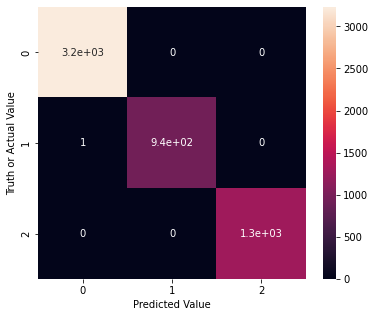

In [ ]:
import seaborn as sns
plt.figure(figsize = (6,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

# **SVM**

In [ ]:
# Dimension of Train and Test set
print("Dimension of Train set",xtrain.shape)
print("Dimension of Test set",xtest.shape,"\n")
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

#Total Number of Continous and Categorical features in the training set
num_cols = xtrain._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))
names_of_predictors = list(xtrain.columns.values)
# Scaling the Train and Test feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

Dimension of Train set (12734, 27)
Dimension of Test set (5458, 27) 

Number of numeric features: 27


In [ ]:
#Libraries to Build Ensemble Model : Random Forest Classifier
# Create the parameter grid based on the results of random search
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
ypred = final_model.predict(X_test_scaled)
#Y_pred_label = list(encoder.inverse_transform(ypred))

Best score for training data: 1.0 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [ ]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(ytest,ypred))
print("\n")
print(classification_report(ytest,ypred))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , ytrain))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , ytest ))

[[3230    0    0]
 [   0  945    0]
 [   0    0 1283]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3230
           1       1.00      1.00      1.00       945
           2       1.00      1.00      1.00      1283

    accuracy                           1.00      5458
   macro avg       1.00      1.00      1.00      5458
weighted avg       1.00      1.00      1.00      5458

Training set score for SVM: 1.000000
Testing  set score for SVM: 1.000000


**OneVsAll**

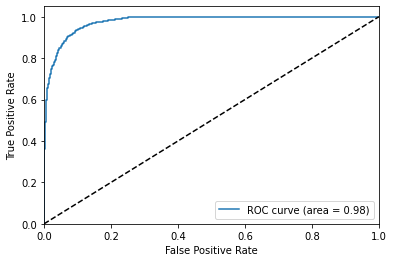

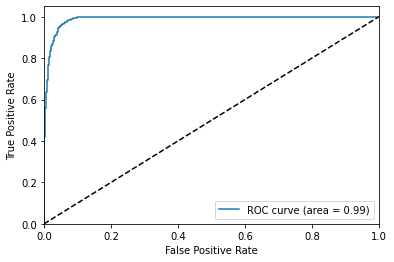

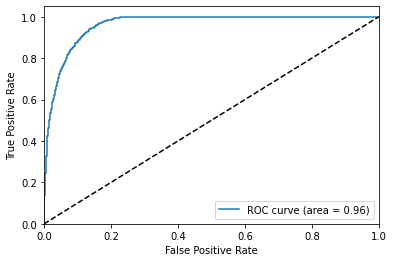

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(xtrain, ytrain).decision_function(xtest)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()